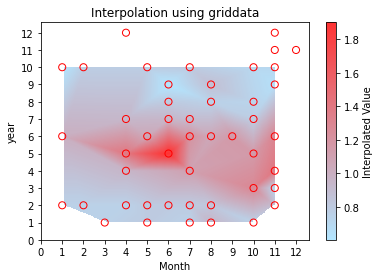

In [66]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
import matplotlib as mpl
import matplotlib.colors as mcolors

data = np.array([
    [0, 0, 0.75, 0, 0.8, 0, 0.75, 0.95, 0, 0.75, 0, 0],
    [0.75, 0.75, 0, 0.75, 0.8, 0.8, 0.8, 0.83, 0, 0, 0.9, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 1.28, 0.73, 0],
    [0, 0, 0, 0.95, 0, 0, 1.1, 0, 0, 0, 1.4, 0],
    [0, 0, 0, 1.4, 0, 1.92, 0, 0, 0, 1.15, 0, 0],
    [1.0, 0, 0, 0, 1.05, 0, 1.2, 1.05, 1.15, 0, 1.3, 0],
    [0, 0, 0, 0.94, 0, 0.95, 0.9, 0, 0, 0.78, 0, 0],
    [0, 0, 0, 0, 0, 0.8, 0, 0.75, 0, 0.73, 0, 0],
    [0, 0, 0, 0, 0, 0.6, 0, 0.88, 0, 0, 0.65, 0],
    [0.6, 0.78, 0, 0, 0.78, 0, 0.8, 0, 0, 0.7, 0.7, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.3, 0.95],
    [0, 0, 0, 0.7, 0, 0, 0, 0, 0, 0, 1.2, 0]
])

x_orig = np.arange(1, 13)
y_orig = np.arange(1, 13)

data = np.hstack((np.zeros((12, 1)), data))
data = np.vstack((np.zeros(13), data))

# 包含 NaN 的数据矩阵
data_nan = data.copy()
data_nan[data_nan == 0] = np.nan

# 数据获取有有效值的点 (非 NaN 值)
data_valid_points = ~np.isnan(data_nan)
y_valid, x_valid = np.nonzero(data_valid_points)  # use np.nonzero instead of np.where
z_valid = data_nan[data_valid_points]

# 建立新网格
x_new = np.linspace(0,11,200)
y_new = np.linspace(0,10,200)
X_new, Y_new = np.meshgrid(x_new, y_new)

# 网格数据内插
Z_new = griddata((x_valid, y_valid), z_valid, (X_new, Y_new), method='linear')

# 创建从浅蓝色到红色的自定义颜色映射
colors = [(0.7, 0.9, 1, 1), (1, 0.2, 0.2, 1)]
cmap_name = 'blue_to_red'
colormap = mcolors.LinearSegmentedColormap.from_list(cmap_name, colors)

# 使用支持中文的字体
mpl.rcParams['font.sans-serif'] = ['SimHei']
mpl.rcParams['axes.unicode_minus'] = False


# 绘图
plt.imshow(Z_new, extent=[x_new.min(), x_new.max(), y_new.min(), y_new.max()],
           origin='lower', cmap=colormap, aspect='auto')  # 使用自定义的 colormap
plt.colorbar(label='Interpolated Value')
plt.scatter(x_valid, y_valid, color='red', marker="o", s=50, facecolors='none', edgecolors='r')
plt.xlabel('Month')
plt.ylabel('year')

# 設置刻度
# plt.xticks(np.arange(12))
# plt.yticks(np.arange(11))

plt.xticks(np.arange(len(data[0])))
plt.yticks(np.arange(len(data)))

plt.title('Interpolation using griddata')
plt.show()

In [88]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
import matplotlib as mpl
import matplotlib.colors as mcolors

In [89]:
data = np.array([
    [0, 0, 0.75, 0, 0.8, 0, 0.75, 0.95, 0, 0.75, 0, 0],
    [0.75, 0.75, 0, 0.75, 0.8, 0.8, 0.8, 0.83, 0, 0, 0.9, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 1.28, 0.73, 0],
    [0, 0, 0, 0.95, 0, 0, 1.1, 0, 0, 0, 1.4, 0],
    [0, 0, 0, 1.4, 0, 1.92, 0, 0, 0, 1.15, 0, 0],
    [1.0, 0, 0, 0, 1.05, 0, 1.2, 1.05, 1.15, 0, 1.3, 0],
    [0, 0, 0, 0.94, 0, 0.95, 0.9, 0, 0, 0.78, 0, 0],
    [0, 0, 0, 0, 0, 0.8, 0, 0.75, 0, 0.73, 0, 0],
    [0, 0, 0, 0, 0, 0.6, 0, 0.88, 0, 0, 0.65, 0],
    [0.6, 0.78, 0, 0, 0.78, 0, 0.8, 0, 0, 0.7, 0.7, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.3, 0.95],
    [0, 0, 0, 0.7, 0, 0, 0, 0, 0, 0, 1.2, 0]
])

# 設定座標原始
x_orig = np.arange(1, 13)
y_orig = np.arange(1, 13)

data = np.hstack((np.zeros((12, 1)), data))
data = np.vstack((np.zeros(13), data))

# 原始座標
x_orig = np.arange(12)
y_orig = np.arange(11)
X_orig, Y_orig = np.meshgrid(x_orig, y_orig)

In [90]:
# 包含 NaN的數據矩陣
data_nan = data.copy()
data_nan[data_nan == 0] = np.nan

In [91]:
# 数据获取有有效值的点 (非 NaN 值)
data_valid_points = ~np.isnan(data_nan)
y_valid, x_valid = np.nonzero(data_valid_points)  # use np.nonzero instead of np.where
z_valid = data_nan[data_valid_points]

In [92]:
# 建立新网格
x_new = np.linspace(0,11,200)
y_new = np.linspace(0,10,200)
X_new, Y_new = np.meshgrid(x_new, y_new)

In [93]:
# 网格数据内插
Z_new = griddata((x_valid, y_valid), z_valid, (X_new, Y_new), method='linear')

In [94]:
# 创建从浅蓝色到红色的自定义颜色映射
colors = [(0.7, 0.9, 1, 1), (1, 0.2, 0.2, 1)]
cmap_name = 'blue_to_red'
colormap = mcolors.LinearSegmentedColormap.from_list(cmap_name, colors)

In [95]:
# 使用支持中文的字体
mpl.rcParams['font.sans-serif'] = ['SimHei']
mpl.rcParams['axes.unicode_minus'] = False

Text(0, 0.5, 'year')

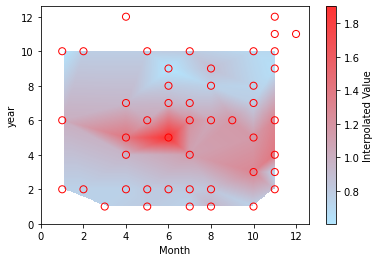

In [96]:
# 绘图
plt.imshow(Z_new, extent=[x_new.min(), x_new.max(), y_new.min(), y_new.max()],
           origin='lower', cmap=colormap, aspect='auto')  # 使用自定义的 colormap
plt.colorbar(label='Interpolated Value')
plt.scatter(x_valid, y_valid, color='red', marker="o", s=50, facecolors='none', edgecolors='r')
plt.xlabel('Month')
plt.ylabel('year')


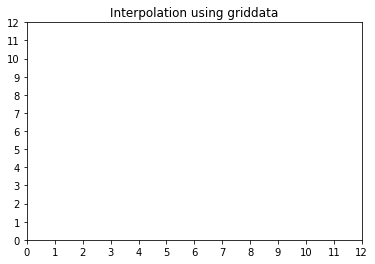

In [97]:
# 設置刻度
plt.xticks(np.arange(len(data[0])))
plt.yticks(np.arange(len(data)))

plt.title('Interpolation using griddata')
plt.show()